In [1]:
"""Transform stock prices and returns"""
# library
from datetime import timedelta

import numpy as np
import pandas as pd
from common import (date_col, max_date, missing_code, price_col,
                    processed_path, raw_path, raw_price_col,
                    risk_col, symbol_col)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
"""Risk free rate"""
# monthly
risk_cols = [date_col, risk_col]
risk_monthly_raw = pd.read_csv(raw_path["risk_monthly"])
risk_monthly_raw[date_col] = pd.to_datetime(
    risk_monthly_raw["month"], format="%Ym%m")\
    .dt.to_period("M").dt.to_timestamp("M")
risk_monthly_raw = risk_monthly_raw[risk_cols]
# daily
risk_daily_raw = pd.read_csv(raw_path["risk_daily"])
risk_daily_raw[date_col] = pd.to_datetime(
    risk_daily_raw["date"])
risk_daily_raw = risk_daily_raw[risk_cols]

In [3]:
risk_monthly_raw.head()

,date,rf
0,1980-10-31,0.011246
1,1980-11-30,0.010202
2,1980-12-31,0.010252
3,1981-01-31,0.009949
4,1981-02-28,0.009175


In [4]:
risk_daily_raw.head()

,date,rf
0,1988-10-03,0.000422
1,1988-10-04,0.000423
2,1988-10-05,0.000425
3,1988-10-06,0.000425
4,1988-10-07,0.000425


,rf
date,
1980-10-31,0.011246
1980-11-30,0.010202
1980-12-31,0.010252
1981-01-31,0.009949
1981-02-28,0.009175


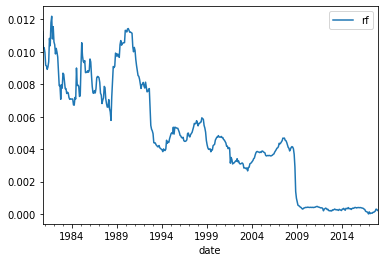

In [5]:

# compute risk free returns
risk_monthly = risk_monthly_raw.set_index(date_col)\
    .sort_values(by=date_col)\
    .astype("float")

risk_monthly.plot()

risk_monthly.head()

,rf
date,
1988-10-03,0.000422
1988-10-04,0.000423
1988-10-05,0.000425
1988-10-06,0.000425
1988-10-07,0.000425


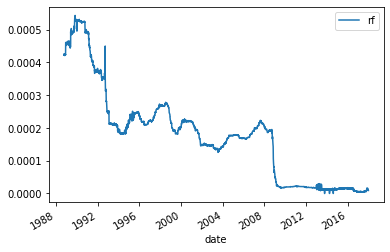

In [6]:

risk_daily = risk_daily_raw.set_index(date_col)\
    .sort_values(by=date_col)\
    .astype("float")

risk_daily.plot()

risk_daily.head()

In [7]:
"""Price data"""
# preprocessing monthly price data
headers = ["date", "open", "high",
           "low", "close", "adj_close", "volume", "symbol"]
price_monthly_raw = pd.read_csv(raw_path["price_monthly"], header=None)\
    .dropna(axis=0)
price_monthly_raw.columns = headers
price_monthly_raw[date_col] = pd.to_datetime(
    price_monthly_raw[date_col]) - timedelta(days=1)
price_monthly_raw[symbol_col] = price_monthly_raw.loc[:, symbol_col]\
    .str.replace(".L", "", regex=False)

In [8]:
# preprocess daily price data
price_daily_raw = pd.read_csv(raw_path["price_daily"], header=None)
price_daily_raw.columns = headers
price_daily_raw[date_col] = pd.to_datetime(price_daily_raw[date_col])
price_daily_raw[symbol_col] = price_daily_raw.loc[:, symbol_col]\
    .str.replace(".L", "", regex=False)

In [9]:
price_monthly_raw[price_monthly_raw.loc[:, symbol_col] == "3IN"]

,date,open,high,low,close,adj_close,volume,symbol
0,2007-02-28,140.740601,144.226807,136.870300,142.147995,86.581375,20705141.0,3IN
1,2007-03-31,141.796204,143.907303,135.462906,140.740601,85.724159,11498548.0,3IN
2,2007-04-30,140.388794,145.314697,139.333206,144.610992,88.081581,6343479.0,3IN
3,2007-05-31,144.962906,146.116898,140.740601,142.851700,87.010002,5760350.0,3IN
4,2007-06-30,143.555405,143.555405,139.264297,140.036896,85.295525,6216603.0,3IN
5,2007-07-31,138.629501,140.740601,132.296204,138.981400,84.652649,11170907.0,3IN
6,2007-08-31,139.333206,145.666595,137.925797,143.907303,87.652969,46075819.0,3IN
7,2007-09-30,142.851700,150.592499,140.740601,146.370300,89.153175,17032412.0,3IN
8,2007-10-31,146.370300,149.185104,143.907303,149.185104,90.867653,10988465.0,3IN
9,2007-11-30,147.074005,150.592499,144.962906,147.777695,90.010391,7621428.0,3IN


In [10]:
price_daily_raw[price_daily_raw.loc[:, symbol_col] == "3IN"]

,date,open,high,low,close,adj_close,volume,symbol
0,2007-03-08,140.740601,140.740601,136.870300,137.574005,83.795403,6562572.0,3IN
1,2007-03-09,137.222107,137.890594,137.081406,137.222107,83.581062,428937.0,3IN
2,2007-03-12,137.925797,138.559204,137.222107,140.740601,85.724159,705892.0,3IN
3,2007-03-13,137.925797,140.740601,137.925797,139.685104,85.081261,1642505.0,3IN
4,2007-03-14,138.981400,140.723694,137.925797,137.574005,83.795403,499153.0,3IN
...,...,...,...,...,...,...,...,...
3791,2022-03-08,320.000000,337.500000,318.019989,333.500000,333.500000,1578331.0,3IN
3792,2022-03-09,340.500000,351.095001,336.220001,347.000000,347.000000,746004.0,3IN
3793,2022-03-10,346.000000,350.000000,340.500000,347.000000,347.000000,664369.0,3IN
3794,2022-03-11,351.500000,358.500000,343.619995,350.000000,350.000000,768129.0,3IN


In [11]:
"""Process data

1. Filter March 2022 data (incomplete data)
2. Compute returns with log differences
3. Combine with risk-free data
4. Compute excess return
5. Keep only excess returns
"""
# process monthly data
exclude_date = "2022-03-15"
monthly_price = price_monthly_raw.loc[
    price_monthly_raw[date_col] != exclude_date]\
    .set_index([symbol_col, date_col])\
    .sort_values(by=[symbol_col, date_col])\
    .groupby(symbol_col)\
    .apply(lambda x: np.log(x) - np.log(x.shift(1)))\
    .combine_first(risk_monthly)

monthly_price.loc["3IN"]

/home/ling/miniconda3/envs/ap_tf2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ling/miniconda3/envs/ap_tf2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,adj_close,close,high,low,open,rf,volume
date,,,,,,,
2007-02-28,NaN,NaN,NaN,NaN,NaN,0.004326,NaN
2007-03-31,-0.009950,-0.009950,-0.002218,-0.010336,0.007472,0.004376,-0.588161
2007-04-30,0.027129,0.027129,0.009732,0.028170,-0.009975,0.004452,-0.594793
2007-05-31,-0.012240,-0.012240,0.005505,0.010050,0.032062,0.004527,-0.096429
2007-06-30,-0.019901,-0.019901,-0.017686,-0.010545,-0.009757,0.004686,0.076225
2007-07-31,-0.007566,-0.007566,-0.019803,-0.051330,-0.034916,0.004669,0.586089
2007-08-31,0.034829,0.034829,0.034402,0.041672,0.005063,0.004686,1.416975
2007-09-30,0.016970,0.016970,0.033257,0.020203,0.024939,0.004552,-0.995170
2007-10-31,0.019048,0.019048,-0.009390,0.022251,0.024333,0.004527,-0.438272


,excess_returns
date,
2007-02-28,NaN
2007-03-31,-0.014326
2007-04-30,0.022677
2007-05-31,-0.016767
2007-06-30,-0.024587
2007-07-31,-0.012235
2007-08-31,0.030143
2007-09-30,0.012418
2007-10-31,0.014521


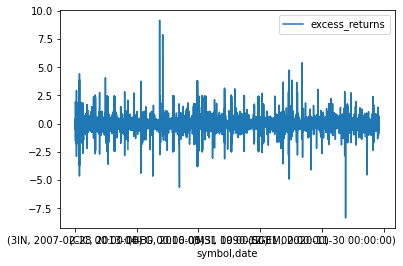

In [12]:
# compute excess returns and keep only excess return
monthly_price[price_col] = monthly_price[raw_price_col]\
    - monthly_price[risk_col]
monthly_price = monthly_price[[price_col]].astype("float")

monthly_price.plot()
monthly_price.loc["3IN"]

In [13]:
# process daily data
daily_price = price_daily_raw\
    .set_index([symbol_col, date_col])\
    .sort_values(by=[symbol_col, date_col])\
    .groupby(symbol_col)\
    .apply(lambda x: np.log(x) - np.log(x.shift(1)))\
    .combine_first(risk_daily)

daily_price.loc["3IN"]

/home/ling/miniconda3/envs/ap_tf2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ling/miniconda3/envs/ap_tf2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,adj_close,close,high,low,open,rf,volume
date,,,,,,,
2007-03-08,NaN,NaN,NaN,NaN,NaN,0.000199,NaN
2007-03-09,-0.002561,-0.002561,-0.020458,0.001541,-0.025318,0.000198,-2.727828
2007-03-12,0.025318,0.025318,0.004837,0.001026,0.005115,0.000198,0.498152
2007-03-13,-0.007528,-0.007528,0.015621,0.005115,0.000000,0.000198,0.844516
2007-03-14,-0.015229,-0.015229,-0.000120,0.000000,0.007624,0.000198,-1.191065
...,...,...,...,...,...,...,...
2022-03-08,0.035091,0.035091,0.040822,0.048381,0.009419,NaN,-1.043217
2022-03-09,0.039682,0.039682,0.039491,0.055651,0.062094,NaN,-0.749392
2022-03-10,0.000000,0.000000,-0.003124,0.012649,0.016024,NaN,-0.115893


,excess_returns
date,
2007-03-08,NaN
2007-03-09,-0.002759
2007-03-12,0.025120
2007-03-13,-0.007726
2007-03-14,-0.015426
...,...
2022-03-08,NaN
2022-03-09,NaN
2022-03-10,NaN


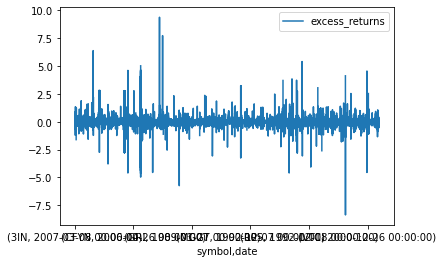

In [14]:
daily_price[price_col] = daily_price[raw_price_col]\
    - daily_price[risk_col]
daily_price = daily_price[[price_col]].astype("float")

daily_price.plot()
daily_price.loc["3IN"]

In [15]:
"""Add in firm-specific characteristics data"""


def get_r2_1(df):
    """Return lagged one-month return"""
    price = df.reset_index()\
        .set_index(date_col)\
        .loc[:, [price_col]]\
        .shift(1)
    price.columns = ["r2_1"]
    return price


def get_r12_7(df):
    """Return cum returns from 12 months ago to 7 months ago"""
    price = df.reset_index()\
        .set_index(date_col)\
        .loc[:, [price_col]]\
        .replace(missing_code, float("NaN"))\
        .cumsum()
    result = price.shift(7) - price.shift(13)
    result.columns = ["r12_7"]
    return result


def drop_year(df):
    """Drop df if the entry is not full year."""
    start = df.index.get_level_values("date").min().year
    start = pd.to_datetime(f"{start}-01-01") + pd.tseries.offsets.MonthEnd()
    end = min(df.index.get_level_values("date").max(),
              pd.to_datetime(max_date))
    index = pd.date_range(start=start, end=end, freq="M", name=date_col)
    df_new = df.reindex(index)
    first_na = df_new[index == start].isna().sum().values[0]
    if first_na >= 1:
        # first entry of the year is missing
        start += pd.DateOffset(years=1)
        df_new = df_new[index >= start]
    return df_new


def get_rel2high(df):
    """Get Closeness to past year high.

    (not used to maximise data available)
    Ratio of stock price at previous month and highest daily
    price in past year."""
    df = df.reset_index()
    df[date_col] = df[date_col] + pd.DateOffset(years=1)
    groupby = df.set_index(date_col)\
        .groupby(symbol_col)
    month_price = groupby.apply(lambda x: x.resample("M").last())\
        .drop(columns=[symbol_col])
    year_price = groupby.apply(lambda x: x.resample("Y").max())\
        .drop(columns=[symbol_col])\
        .reindex(month_price.index, method="bfill")
    df = month_price / year_price
    df.columns = ["rel2high"]

    # need to drop first year data if we do not have full
    # year for the variance
    df = df.reset_index()\
        .set_index(date_col)\
        .groupby(symbol_col)\
        .apply(drop_year)\
        .drop(columns=[symbol_col])

    return df


monthly_groupby = monthly_price.groupby(symbol_col)

# add in past return firm characteristics data
monthly_final = monthly_price.copy()\
    .combine_first(monthly_groupby.apply(get_r2_1))\
    .combine_first(monthly_groupby.apply(get_r12_7))\
    .dropna()

monthly_final.loc["3IN"]

,excess_returns,r12_7,r2_1
date,,,
2008-04-30,0.024058,0.011650,0.031747
2008-05-31,0.008577,0.003494,0.024058
2008-06-30,-0.014719,0.006356,0.008577
2008-07-31,-0.006258,0.047877,-0.014719
2008-08-31,-0.079115,0.099332,-0.006258
2008-09-30,-0.217693,0.049382,-0.079115
2008-10-31,0.112350,0.068711,-0.217693
2008-11-30,-0.187265,0.078248,0.112350
2008-12-31,0.072479,0.100730,-0.187265


In [16]:
# export
monthly_final.to_csv(processed_path["returns"])